## Day 39: Analyze, Transform, and Shift Data. 

In this challenge, you will analyze and transform data. You  will import the cars_and_careers CSV file.

1. Import the cars_and_careers dataset. Using the pandas 
describe() method, what is the mean age of the "Age" 
column? 


In [21]:
import pandas as pd
age_mean = df["Age"].describe()["mean"]
print('The mean age is', age_mean)


The mean age is 34.75


2. Using the pandas transform() method, convert the items in 
the "cars" column into lowercase letters. 


In [28]:
# Create a copy of DataFrame
df_copy = df.copy()

df_copy["Car"] = df_copy["Car"].transform(lambda x: x.title())


df_copy["Occupation"] = df_copy["Occupation"].transform(lambda x: x.capitalize())
df_copy.head(20)

,Name,Occupation,Age,Car
0,John,Engineer,32,Toyota Camry
1,Emily,Teacher,28,Honda Civic
2,Michael,Doctor,45,Ford Mustang
3,Emma,Lawyer,37,Bmw 3 Series
4,David,Artist,41,Mercedes-Benz C-Class
5,Olivia,Chef,35,Chevrolet Cruze
6,Daniel,Scientist,29,Audi A4
7,Sophia,Writer,33,Volkswagen Golf
8,James,Accountant,39,Tesla Model S
9,Isabella,Nurse,27,Nissan Sentra


3. You have come across some new information that must be 
added to your DataFrame. Using pandas shift() and .iloc 
attributes, insert a row into your DataFrame. This row will 
sit at index 0. The row is: ["Casy", "Ford", 31]. The last row 
["Grace", "Ford Explorer", 29] must be removed. 


In [24]:
# Using shft to move row
df1 = df_copy.shift(periods=1, axis="rows")

# Using iloc to insert new row
df1.loc[0] = ["Casy", "Dancer", 31, "Tesla"]
df1.head(20)

,Name,Occupation,Age,Car
0,Casy,Dancer,31.0,Tesla
1,John,Engineer,32.0,Toyota Camry
2,Emily,Teacher,28.0,Honda Civic
3,Michael,Doctor,45.0,Ford Mustang
4,Emma,Lawyer,37.0,Bmw 3 Series
5,David,Artist,41.0,Mercedes-Benz C-Class
6,Olivia,Chef,35.0,Chevrolet Cruze
7,Daniel,Scientist,29.0,Audi A4
8,Sophia,Writer,33.0,Volkswagen Golf
9,James,Accountant,39.0,Tesla Model S


4. Using the pandas.str.find() method, write a code to confirm 
if the name "Grace" has been removed from the DataFrame. 


In [26]:
is_ben_present = not (df1['Name'].str.find("Grace").sum() == -len(df1))
is_ben_present

False

5. What car does a person by the name of "Emily" drive? And 
what is her occupation? 


In [30]:
# Getting Emily's index in the DataFrame

emily_index = df1.index[df1["Name"]=="Emily"].tolist()

# Using index to get Emily's car 
emily_car = df1.loc[emily_index, "Car"]

# Using index to get Emily's Occupation
emily_occupation = df1.loc[emily_index, "Occupation"]
print(f'Emily drives a: {str(emily_car.tolist()[0])}')
print(f"Emily's occupation is: {emily_occupation.tolist()[0]}")

Emily drives a: Honda Civic
Emily's occupation is: Teacher


In [31]:
emily = df1.loc[df1["Name"] == "Emily"].iloc[0]

print(f"Emily drives a: {emily['Car']}")
print(f"Emily's occupation is: {emily['Occupation']}")


Emily drives a: Honda Civic
Emily's occupation is: Teacher


6. Which car is driven by the oldest person? Using Matplotlib, 
plot a bar plot of the cars driven by the 5 oldest people and 
their ages in descending order. 


In [40]:

sort_age = df1.sort_values(["Age"], ascending=False).iloc[0]

print(f"Car driven by the oldest person is {sort_age["Car"]}")

Car driven by the oldest person is Ford Mustang


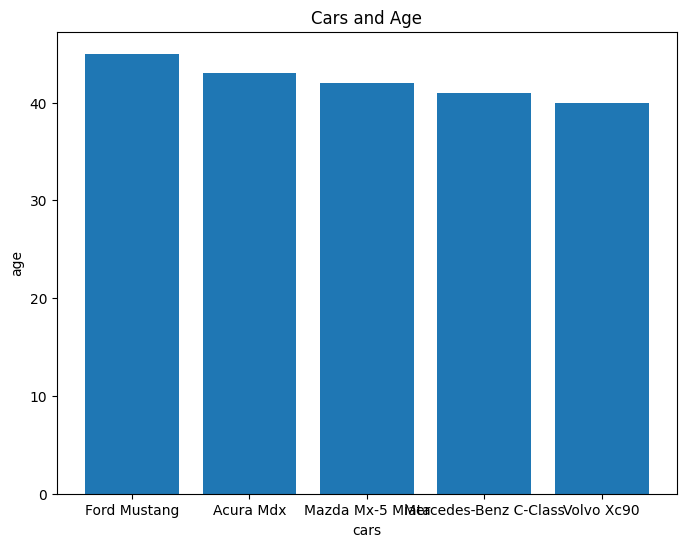

In [42]:
import matplotlib.pyplot as plt 

# Sorting data by the "Age" column
df1_sorted = df1.sort_values(by="Age", ascending=False).head()

# Getting the cars column 
cars = df1_sorted["Car"]

# Getting the age column
age = df1_sorted["Age"]

plt.figure(figsize=(8, 6))
plt.bar(cars, age)

#plt.xticks(rotation=90
plt.xlabel("cars")
plt.ylabel("age")
plt.title("Cars and Age", fontsize=12)
plt.show()

7. For data to be used in machine learning algorithms, it must 
be converted to a numerical format. This is because 
machine learning algorithms can only understand 
numbers. Your task now is to write code that will convert 
the text columns into numeric data types for machine 
learning using first, pandas and then Sklearn. 

In [43]:
# Create dummy variables
df_modified = pd.get_dummies(df1, columns=["Name", "Occupation", "Car"], dtype=int)
df_modified

,Age,Name_Alexander,Name_Amelia,Name_Andrew,Name_Ava,Name_Benjamin,Name_Casy,Name_Charlotte,Name_Daniel,Name_David,...,Car_Lexus Rx,Car_Mazda Mx-5 Miata,Car_Mercedes-Benz C-Class,Car_Nissan Sentra,Car_Subaru Outback,Car_Tesla,Car_Tesla Model S,Car_Toyota Camry,Car_Volkswagen Golf,Car_Volvo Xc90
0,31.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,32.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,45.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,37.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,41.0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
6,35.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,29.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
8,33.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
9,39.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [44]:
# Checking the number of columns 
df_modified.shape[1]

61

In [ ]:
# Using sklearn rather than get_dummy

from sklearn.processing import LabelEncoder

# Initialize label encoders 
cars = LabelEncoder()
names = LabelEncoder()
occupation = LabelEncoder()

# Fit the label encoder to the data 
df1["Car"] = cars.fit_transform(df)